Lecture 4 - Live coding
Subplots and Combining Visualisations

In [ ]:
#Loading Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scipy as sp
import PIL as pil
import requests as req

Learn about subplot notations in matplotlib

Put multiple visualisations on the same axes objects


Show errors.

In [7]:
#Setting up data
#WE will ahve two x and 2 y axis
np.random.seed(613)
x1 =np.arange(50)
y1 = np.random.randint(0, 75, 50)
x2 = np.array(['Luffy', 'Zoro','Nami','Usopp','Sanji'])
y2=np.array([110,180,240,99,220])

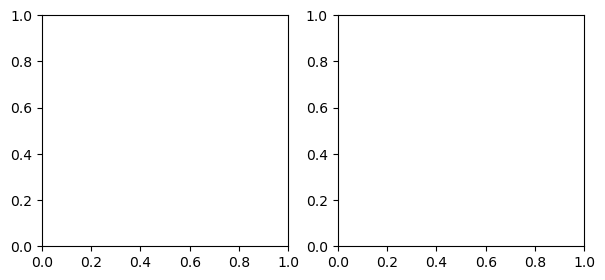

In [8]:
#In past lessions to define figures and its one axes, we would type
#fig, ax = plt.subplots(figsize=(5,3))
#However, now we want to plot two plots enxt to each other
#need to define multiple axes and their relative positions
fig, (ax1, ax2)=plt.subplots(ncols=2,
                             nrows=1,
                             figsize=(7,3))

C:\Users\danie\AppData\Local\Temp\ipykernel_6304\2622889527.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


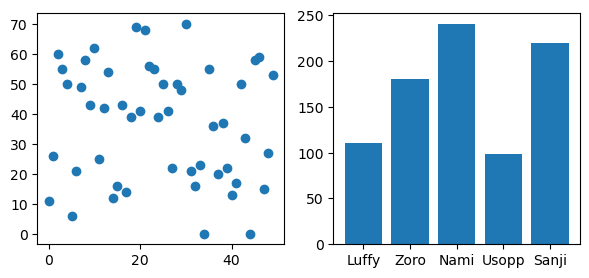

In [10]:
fig, (ax1, ax2)=plt.subplots(ncols=2,
                             nrows=1,
                             figsize=(7,3))
ax1.scatter(x1,y1)
ax2.bar(x2,y2)
fig.show()

•	Activity – customising our plots

    o	Refer to past slides and class activities to customise the subplots we just made
    o	Think about adding the titles or annotations, or modifying colour, marker type and fonts – differently for each subplot


C:\Users\danie\AppData\Local\Temp\ipykernel_6304\1077979731.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


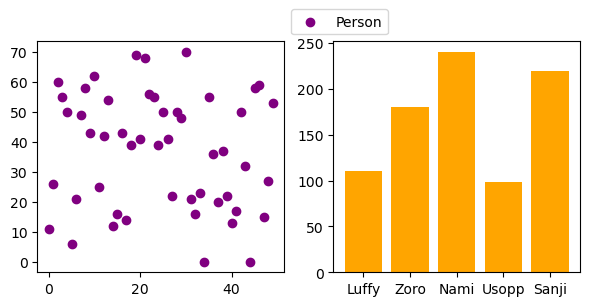

In [ ]:
#Activity- modify
fig, (ax1, ax2)=plt.subplots(ncols=2,
                             nrows=1,
                             figsize=(7,3))
ax1.scatter(x1,y1,label='Person',color='purple')
ax1.legend(loc='lower left',
            bbox_to_anchor=(1,1))
ax2.bar(x2,y2,color='orange')

fig.show()

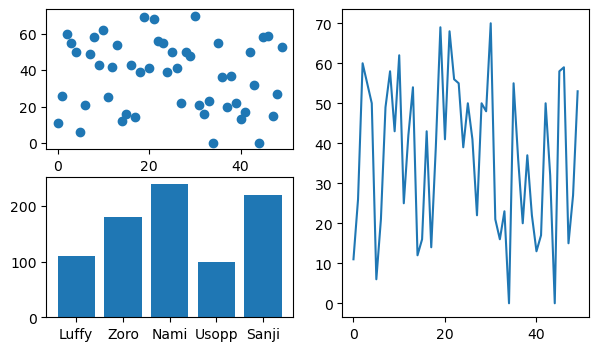

In [22]:
#Subplots without grid arrangement - data
#Can add data to each of our subplots the same way we did before, but reference each axes albel in some axes lists
fig, someaxes =plt.subplot_mosaic([['ax1','ax3'],
                                   ['ax2','ax3']],
                                   figsize=(7,4))
someaxes['ax1'].scatter(x1,y1)
someaxes['ax2'].bar(x2,y2)
someaxes['ax3'].plot(x1,y1)
plt.show()

Text(0.5, 0, 'Label 2: 2 Fast 2 Furious')

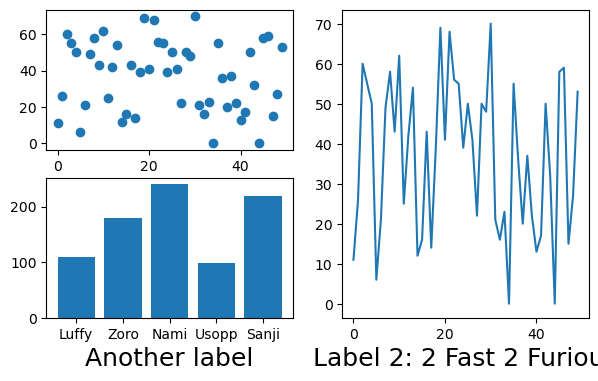

In [23]:
#Layouts
    #Lets try adding some very large x-axis titles to our previous plots
#We should see that everything gets squished

fig, someaxes =plt.subplot_mosaic([['ax1','ax3'],
                                   ['ax2','ax3']],
                                   figsize=(7,4))
someaxes['ax1'].scatter(x1,y1)
someaxes['ax2'].bar(x2,y2)
someaxes['ax3'].plot(x1,y1)

someaxes['ax1'].set_xlabel('A Big Label',fontsize=18)
someaxes['ax2'].set_xlabel('Another label',fontsize=18)
someaxes['ax3'].set_xlabel('Label 2: 2 Fast 2 Furious',fontsize=18)


Text(0.5, 0, 'Label 2: 2 Fast 2 Furious')

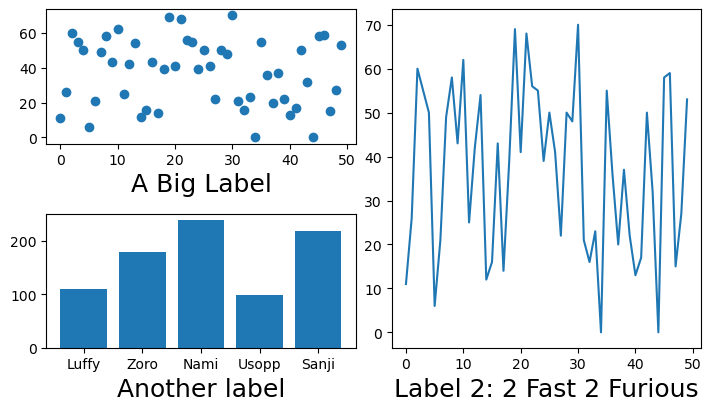

In [24]:
#Layouts
#Lets try a constrained method

fig, someaxes =plt.subplot_mosaic([['ax1','ax3'],
                                   ['ax2','ax3']],
                                   figsize=(7,4),
                                   layout='constrained')    #This is the constrained method
someaxes['ax1'].scatter(x1,y1)
someaxes['ax2'].bar(x2,y2)
someaxes['ax3'].plot(x1,y1)

someaxes['ax1'].set_xlabel('A Big Label',fontsize=18)
someaxes['ax2'].set_xlabel('Another label',fontsize=18)
someaxes['ax3'].set_xlabel('Label 2: 2 Fast 2 Furious',fontsize=18)


Multiple visualisations on one axes

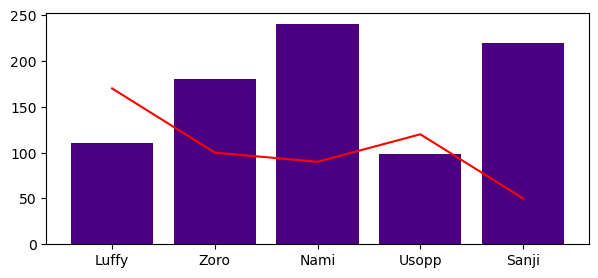

In [25]:
#First make our sample data
x =np.array(['Luffy', 'Zoro','Nami','Usopp','Sanji'])
y1=np.array([110,180,240,99,220])
y2=np.array([170,100,90,120,50])

#Define our figure and axes (just one this time)(
fig, ax =plt.subplots(figsize=(7,3))

#now call both bar and plot elements to the same axes (ax)
ax.bar(x,y1, 
       color='indigo')
ax.plot(x,y2,color='red')

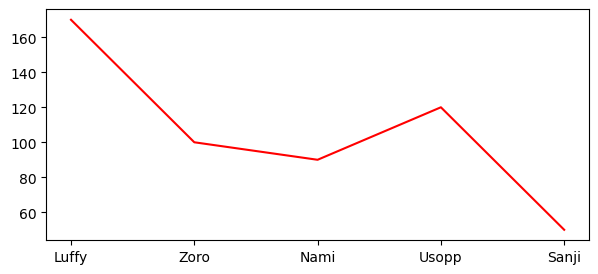

In [26]:
#Adding Error Information
#Same as having two visuaalisations on one axes
#First calculate standard devaiation
y2_sd = np.std(y2)
#Then plot line as before
fig, ax=plt.subplots(figsize=(7,3))
ax.plot(x,y2,color='red')

<ErrorbarContainer object of 3 artists>

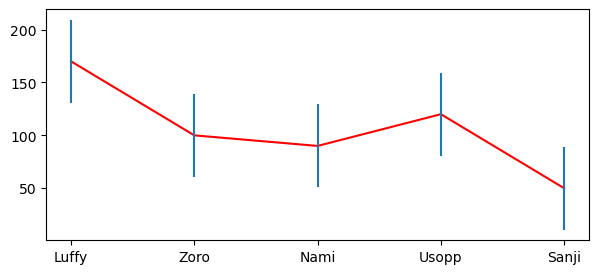

In [ ]:
#Adding Error Information
#Same as having two visuaalisations on one axes
#First calculate standard devaiation
y2_sd = np.std(y2)
#Then plot line as before
fig, ax=plt.subplots(figsize=(7,3))
ax.plot(x,y2,color='red')
#Add the error bar using errorbar() 
ax.errorbar(x,y2, yerr=y2_sd,fmt='none')
#yerr specifies vertical error bars
#fmt makes sure we're not plotting actual data poitns 

<ErrorbarContainer object of 3 artists>

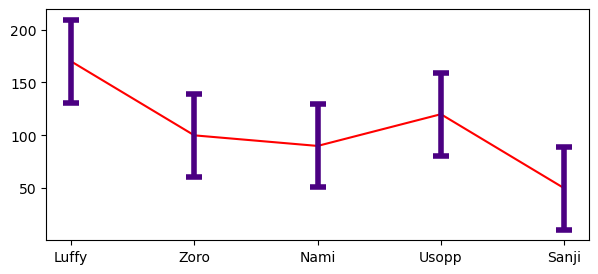

In [30]:
#Customising error bar appearance
#ecolor, elinewidth
#capsize - add the horizontal caps to the error bards
#capthick - how thick the caps are

fig, ax=plt.subplots(figsize=(7,3))
ax.plot(x,y2,color='red')
ax.errorbar(x,y2,
            yerr=y2_sd,
            fmt='none',
            ecolor='indigo',
            elinewidth=4,
            capsize=6,
            capthick=4)

<ErrorbarContainer object of 3 artists>

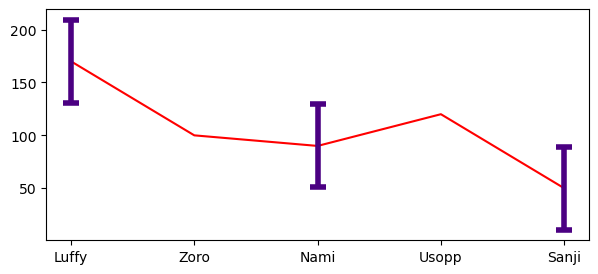

In [31]:
#Errorevery
    #If we dont want to see error bars for every single ploint, we can specify intervals using errorevery
#If we specify for two, it will be eery alternate one
fig, ax=plt.subplots(figsize=(7,3))
ax.plot(x,y2,color='red')
ax.errorbar(x,y2,
            yerr=y2_sd,
            fmt='none',
            ecolor='indigo',
            elinewidth=4,
            capsize=6,
            capthick=4,
            errorevery=2) #This will only show error bars for every second point

Adding images to plots

In [32]:
#Using images from the internet
#need to load some libraries
from PIL import Image #to open images
import requests #to get images from URLs
from io import BytesIO #to store images


In [47]:
#Using images from the internet
#REquest libary gets the image from URL
#Store it in variable called response
#BitesIO stores image in a format that PIL can read
#Use image.open to open the image

response = requests.get("https://upload.wikimedia.org/wikipedia/en/c/cb/Monkey_D_Luffy.png")
image_file = BytesIO(response.content)
image = Image.open(image_file)

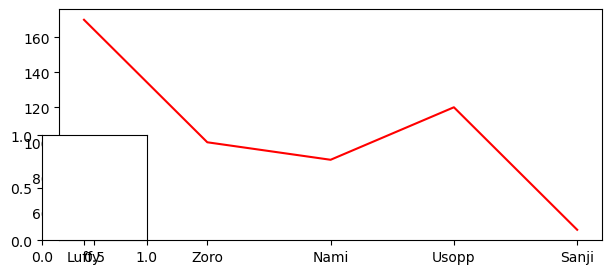

In [36]:
#Adding image to plot
#Make the basic line plot reusing our data
fig, ax=plt.subplots(figsize=(7,3))
ax.plot(x,y2,color='red')
ax_iomage = fig.add_axes([0.1,0.11,0.15,0.35])
#Then we overlay a new axis ('ax_image') onn our figure on top of 'ax' to act as a container for our image
#new fig.add_axes() is a new set of axes we add ontop of existing axes in the same figure container.
#define 4 things
#x and y coordinates of our figure
#Image size width and height using the proportions (percentage - 15% width of the original width 
#35% height of the original image)


In [37]:
ax_image = fig.add_axes([0.1, #x coordinate (On figure, not axes)
                         0.11, #y coordinate (On figure, not axes)
                         0.15, #image width
                         0.35]) #image height

(-0.5, 219.5, 425.5, -0.5)

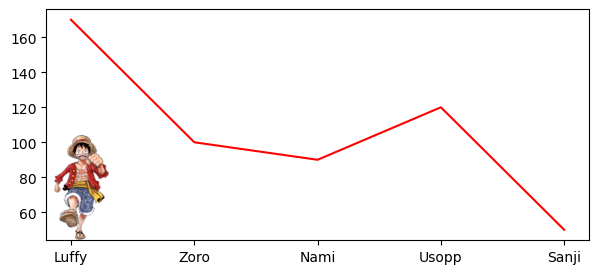

In [49]:
#Now lets add the image to the plot
#add imshow() to add the image prepared before
fig, ax=plt.subplots(figsize=(7,3))
ax.plot(x,y2,color='red')
ax_image = fig.add_axes([0.1,0.11,0.15,0.35])
ax_image.imshow(image)
ax_image.axis('off') #This will remove the axis from the image


In [46]:
#Saving our visualisaiton 
path='C:/Users/andre/OneDrive/Documents/Visualisation/'
#Can be the full path or relative path 
filename = '/fig1a.png'
#Then save the visualisation 
plt.savefig(path+filename, dpi=300)
#Note that path shouldnt end with /since filename starts with it

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/andre/OneDrive/Documents/Visualisation//fig1a.png'

<Figure size 640x480 with 0 Axes>